PLUMOLOGY
=========

`vis`: Visualization and plotting functions

`util`: Various utilities and calculation functions

`io`: Functions to read certain output files and an HDF interface

In [18]:
from plumology import vis, util, io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Reading PLUMED output
---------------------
We read a file in PLUMED output format:

In [6]:
data = io.read_plumed('data.dat')

In [7]:
data.head()

,time,abphi,abpsi,phi5,psi5,dihtrp_cacb,dihtrp_cbcg,peplen,cagyr,eedist
0,90,3.949780,5.595903,-1.716997,2.951164,-0.668110,1.421794,2.069658,0.701871,2.219752
1,190,3.743964,5.198566,-1.722975,2.657496,-1.075799,-1.337500,2.043977,0.696035,2.132239
2,290,3.965079,3.996436,-1.621390,2.336440,-1.208070,-1.699527,1.805404,0.657394,1.989139
3,390,4.939251,6.343268,-2.761580,2.616811,-1.133775,-1.449500,2.166687,0.776754,2.274408
4,490,4.369875,6.241371,-1.034951,2.275747,-1.472459,-1.736087,2.180349,0.743747,2.400522


We can also specify certain columns using regular expressions, and also specify the stepping:

In [10]:
data = io.read_plumed('data.dat', columns=[r'p.i\d', 'peplen'], step=10)

In [11]:
data.head()

,phi5,psi5,peplen
0,-1.716997,2.951164,2.069658
10,-2.509759,2.830119,2.612747
20,-1.162698,2.334276,1.819023
30,-2.824849,2.319441,2.337057
40,-2.588723,0.094210,2.000948


Lets read some MetaD hills files:

In [13]:
hills = io.read_all_hills(['HILLS.0', 'HILLS.1'])

The separate files are horizontally concatenated into one dataframe:

In [14]:
hills.head()

,time,phi5,psi5
0,10.000000,-2.365788,1.731751
1,20.000001,-2.648663,2.423689
2,30.000001,-2.329202,0.659985
3,40.000002,-2.271279,0.022047
4,50.000002,-2.507048,0.045342


Analysis
--------
Lets compute 1D histograms of our collective variables:

In [15]:
dist, ranges = util.dist1D(data, nbins=50)

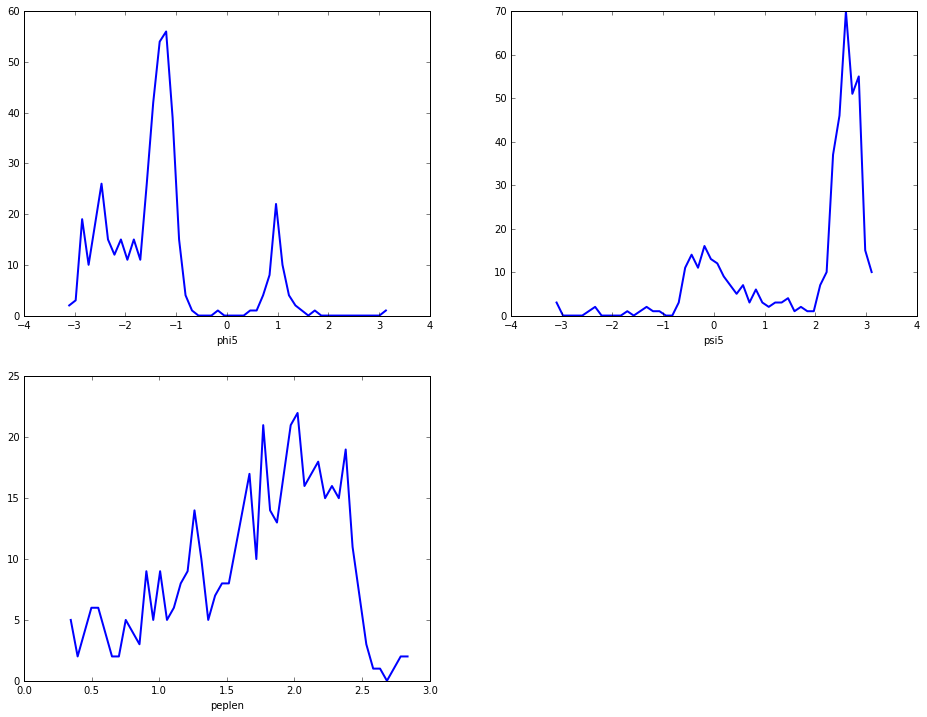

In [19]:
_ = vis.dist1D(dist, ranges)

We also have a *SketchMap* representation of our trajectory and can visualize it as a free-energy surface:

In [30]:
sm_data = io.read_plumed('colvar-red1.dat')

We should probably clip it to a reasonable range first:

In [27]:
clipped_data = util.clip(sm_data, ranges={'cv1': (-50, 50), 'cv2': (-50, 50)})

In [28]:
edges = util.dist1D(clipped_data, ret='edges')
dist = util.dist2D(clipped_data, nbins=50, weight_name='ww')
fes = util.free_energy(dist, kbt=2.49)

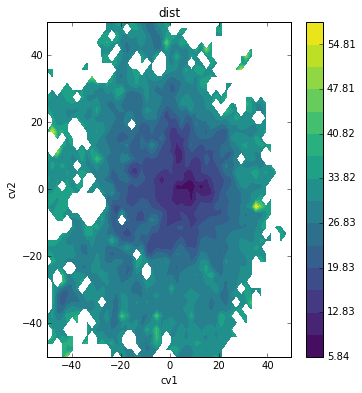

In [29]:
_ = vis.dist2D(fes, edges)